# Building a Beta Zero Portfolio #

In [101]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm
from scipy.optimize import minimize

# Manipulate Files
import os

# Pretty Notation
from IPython.display import display, Math

In [102]:
# Get the important data for the Risk Free Rate

rfr = pd.read_csv(r"..\additional_data\rfr.csv")
rfr = rfr.set_index('Date')
rfr.index = pd.to_datetime(rfr.index, dayfirst=True)
rfr.dropna(inplace = True)

# Get the important data for the S&P500

sp500 = pd.read_csv(rf"..\additional_data\sp500.csv")
sp500 = sp500.set_index('Date')
sp500.index = pd.to_datetime(sp500.index)

In [103]:
# Dictionary to store the DataFrames
folder_path = r"..\stocks"

dataframes = {} 

# List all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        # Full path to the file
        file_path = os.path.join(folder_path, file)
        
        # Read the Excel file
        df = pd.read_csv(file_path)
        df = df.set_index("Date")
        df.index = pd.to_datetime(df.index)

        df = df['Adjusted_close']

        df = df.rename("adj_close")
        
        # Fill nans
        df = df.interpolate(method='time')

        df = df.loc['2015-01-01':]

        df.dropna(inplace=True)
        
        if len(df) >= 2000:
            # File name without extension
            file_name = os.path.splitext(file)[0]
            
            # Guardar en el diccionario
            dataframes[file_name] = df
            # print(f"File loaded: {file_name} ({len(df)} rows)")
        else:
            #print(f"File skipped (less than 2000 rows after cleaning): {file}")
            continue

print(f"\nTotal files loaded: {len(dataframes)}")
print("Files loaded:", list(dataframes.keys()))


Total files loaded: 399
Files loaded: ['A', 'AAPL', 'ABBV', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AOS', 'APA', 'APD', 'APH', 'APO', 'ARE', 'AWK', 'BALL', 'BDX', 'BK', 'BKNG', 'BLDR', 'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CBRE', 'CCI', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DE', 'DECK', 'DELL', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOC', 'DOV', 'DPZ', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'ERIE', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FCX', 'FDS', 'FDX', 'FE', 'FFIV', 'FI', 'FICO', 'FI

In [104]:
# Create the Returns DataFrame
returns_dict = {}

# Create the Loop to Obtain the Betas
for ticker in dataframes.keys():
    df = dataframes[ticker].pct_change(1).dropna()
    returns_dict[ticker] = df

# Create the DataFrame
df_returns = pd.DataFrame.from_dict(returns_dict)
df_returns = df_returns.apply(lambda x: x.fillna(x.mean()), axis=0)

df_returns

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018738,-0.028172,-0.018819,0.000223,-0.004976,-0.018275,-0.034602,-0.000720,-0.014614,-0.010002,...,-0.013804,0.000000,-0.017020,-0.011351,-0.027362,-0.062237,-0.020318,0.037303,-0.014077,-0.006003
2015-01-06,-0.015578,0.000094,-0.004950,-0.011356,-0.020144,-0.023384,-0.019713,-0.008350,-0.019775,-0.011641,...,-0.017107,-0.001108,-0.021331,0.005321,-0.005316,-0.005881,-0.012274,-0.008477,-0.007205,-0.009756
2015-01-07,0.013272,0.014022,0.040417,0.008108,0.008223,0.010516,0.015031,0.008784,-0.002087,0.007778,...,0.016218,0.003050,0.029368,0.008635,0.010133,0.007887,0.033138,0.024870,0.025465,0.020643
2015-01-08,0.029975,0.038422,0.010459,0.020554,0.025383,0.017655,-0.014609,0.022940,0.024747,0.003528,...,0.019657,0.010779,0.012031,0.011599,0.016645,0.007546,0.017420,0.010617,0.021359,0.015399
2015-01-09,-0.007337,0.001072,-0.027355,-0.010508,-0.014743,-0.000730,-0.008530,-0.007162,-0.009014,-0.011206,...,-0.011453,-0.001367,0.012499,-0.012285,-0.001410,-0.018863,-0.001767,-0.014424,0.014613,0.001584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,-0.024130,-0.002622,0.011901,-0.007437,-0.009242,-0.004653,-0.007839,0.001478,-0.004486,-0.005327,...,-0.002959,-0.019820,0.010471,0.003941,0.005163,-0.008678,-0.004776,-0.008935,-0.001584,0.000317
2024-10-23,-0.003222,-0.021623,-0.004662,0.007664,-0.016386,0.009928,0.007003,-0.004462,-0.007574,0.016408,...,0.000140,0.006319,-0.017304,0.010050,-0.003563,0.002664,0.004949,0.004220,-0.010511,-0.002744
2024-10-24,-0.017590,-0.000823,0.009421,-0.004017,-0.004453,0.012475,0.007489,-0.002103,-0.001834,-0.002130,...,0.154343,0.008791,0.002252,0.012282,-0.005654,-0.008123,-0.006417,-0.006686,-0.016409,-0.039632


## Using Historical Beta (No Rebalacing) ##

In [106]:
# Calculate the Correlations Matrix
corr_matrix = df_returns.corr().values  

# Obtain Eigenvalues
eigenvalues, _ = np.linalg.eigh(corr_matrix)

# Identify how much Eigenvalues are small (high colineality)
threshold = 1e-4  # Adjust
num_redundant = sum(eigenvalues < threshold)

print(f"Number of highly collinear variables: {num_redundant}")

Number of highly collinear variables: 0


In [107]:
# Create useful series
risk_free_daily = (((1 + (rfr['risk_free_rate'].div(100)))**(1/360)) - 1)
market_returns = sp500['sp_500'].pct_change(1).dropna()

In [108]:
# Common Index

common_index = df_returns.index.intersection(risk_free_daily.index).intersection(market_returns.index)
df_returns, risk_free_daily, market_returns = df_returns.loc[common_index], risk_free_daily.loc[common_index], market_returns.loc[common_index]

In [109]:
# Create the Weights function
def wexp(N, half_life):
    c = np.log(0.5)/half_life
    n = np.array(range(N))
    w = np.exp(c*n)
    return w/np.sum(w)

window = len(df_returns)
weights = window * wexp(window, window/2)

In [110]:
# Create the Returns DataFrame
betas_dict = {}

# Create the Loop to Obtain the Betas
for ticker in df_returns.columns:
    df = pd.DataFrame()
    df['y'] = df_returns[ticker] - risk_free_daily
    df['x'] = market_returns - risk_free_daily

    # Delete Nans
    df = df.dropna()

    # Add constant
    X = sm.add_constant(df['x'])
    y = df['y']

    # Adjust model
    model = sm.WLS(y, X, weights=weights, missing = 'drop').fit()

    # Extract Betas
    beta = model.params['x']
    
    # Store Betas
    betas_dict[ticker] = beta

# Create the Series
betas_series = pd.Series(betas_dict)

betas_series

A       1.054349
AAPL    1.184110
ABBV    0.765519
ABT     0.911846
ADBE    1.255030
          ...   
XYL     1.059108
YUM     0.841984
ZBH     0.897569
ZBRA    1.329772
ZTS     0.945549
Length: 399, dtype: float64

In [111]:
# Now create the ZBP

def calculate_zbp(
    df_returns,
    historical_betas,
):

    # Betas
    beta = historical_betas.values.flatten().reshape(-1, 1)

    # Covariance Matrix
    Sigma = df_returns.cov().values

    # Inverse of Covariance Matrix
    # lambda_ = 1e-6  # Tikhonov Regularization
    # Sigma_inv = np.linalg.inv(Sigma + lambda_ * np.eye(Sigma.shape[0]))
    
    Sigma_inv = np.linalg.inv(Sigma)

    # Ones
    iota = np.ones((len(beta), 1))

    # Calculate the components
    C = np.dot(np.dot(iota.T, Sigma_inv), iota)
    D = np.dot(np.dot(beta.T, Sigma_inv), beta)
    E = np.dot(np.dot(beta.T, Sigma_inv), iota)
    Delta = (D*C - E*E)

    # Calculate weights
    w = ((D/Delta)*(Sigma_inv @ iota)) - ((E/Delta)*(Sigma_inv @ beta))

    # Calculate Returns
    zbp = df_returns.values @ w  # Resultado es un ndarray (T,1)

    return pd.Series(zbp.flatten(), index=df_returns.index)
    

In [112]:
# Obtain the Returns Applying the Function

zbp_returns = calculate_zbp(df_returns, betas_series)
zbp_returns.name = 'ZBP'

zbp_returns

Date
2015-01-06    0.016221
2015-01-07    0.003130
2015-01-08    0.001591
2015-01-09   -0.001514
2015-01-12    0.008360
                ...   
2024-10-22    0.005391
2024-10-23    0.002397
2024-10-24   -0.004110
2024-10-25   -0.005338
2024-10-28   -0.000641
Name: ZBP, Length: 2453, dtype: float64

In [113]:
# Calculate the beta

df_regression = pd.DataFrame()
df_regression['y'] = zbp_returns - risk_free_daily
df_regression['x'] = market_returns - risk_free_daily
df_regression.dropna(inplace = True)
df_regression = df_regression.mul(100)

df_regression

,y,x
Date,,
2015-01-06,1.616666,-0.894766
2015-01-07,0.307655,1.157592
2015-01-08,0.153537,1.783245
2015-01-09,-0.156835,-0.845828
2015-01-12,0.830731,-0.814651
...,...,...
2024-10-22,0.527652,-0.058914
2024-10-23,0.228147,-0.930668
2024-10-24,-0.422415,0.203122


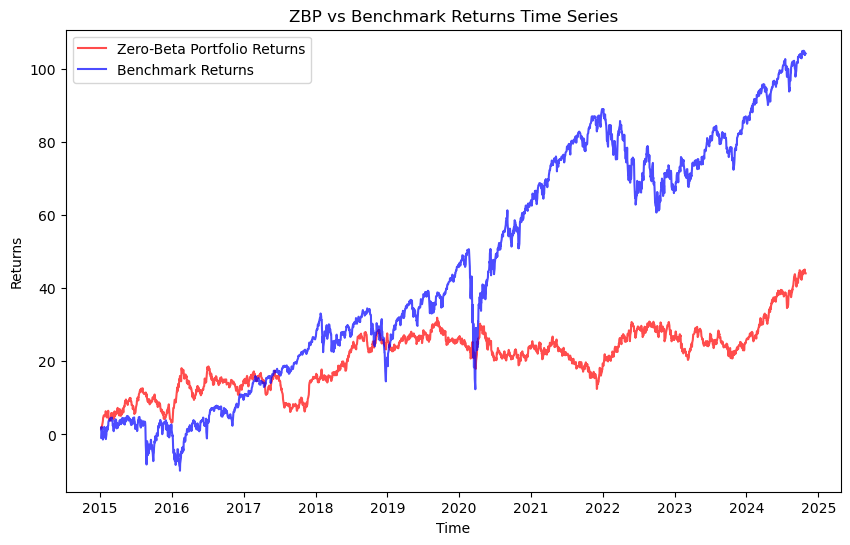

In [114]:
# Create Plot

plt.figure(figsize=(10, 6))
plt.plot(df_regression['y'].cumsum(), label='Zero-Beta Portfolio Returns', color='red', alpha=0.7)
plt.plot(df_regression['x'].cumsum(), label='Benchmark Returns', color='blue', alpha=0.7)

# Config
plt.title('ZBP vs Benchmark Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.show()

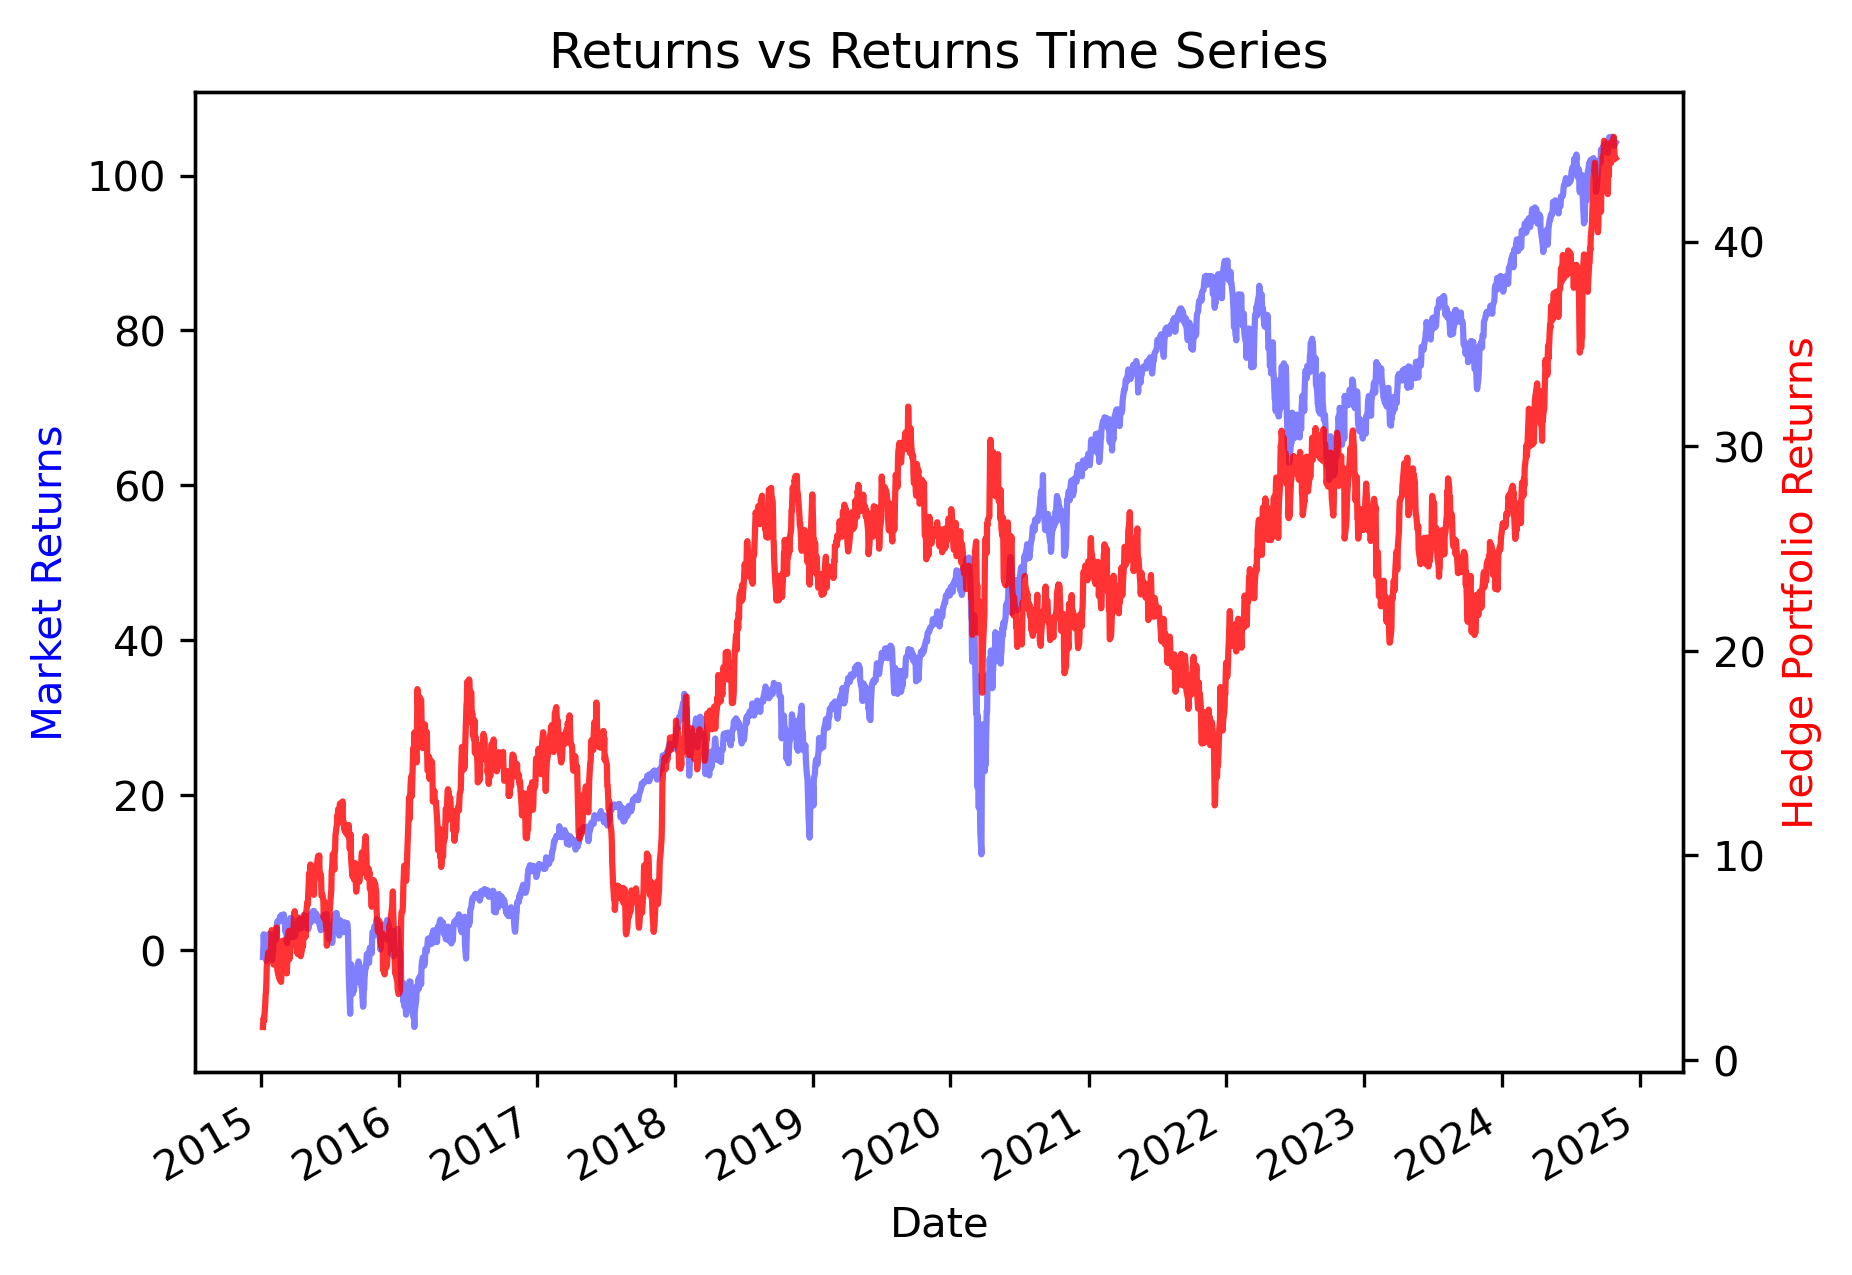

In [115]:
# Create Figure
fig, ax1 = plt.subplots(dpi = 300)

# Market Returns Plot
df_regression['x'].cumsum().plot(color = 'blue', ax = ax1, alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel(
    'Market Returns', 
    color='blue'
    )

# ZBP Returns Plot
ax2 = ax1.twinx()

df_regression['y'].cumsum().plot(color = 'red', ax = ax2, alpha=0.8)
ax2.set_ylabel(
    'Hedge Portfolio Returns', 
    color='red'
    )

plt.title('Returns vs Returns Time Series')
plt.show()

In [116]:
# Correlation between market and our hedge portfolio

df_regression.corr()

,y,x
y,1.000000,0.016318
x,0.016318,1.000000


In [117]:
#Model specification
window = len(df_regression)
weights = window * wexp(window, window/2)

model = sm.WLS(
    df_regression['y'], 
    sm.add_constant(df_regression['x']),
    missing='drop',
    weights=weights
    )   
     
#the results of the model
results = model.fit() 
    
#here we check the summary
print(results.summary()) 

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               1.00
Time:                        17:34:33   Log-Likelihood:                -2320.7
No. Observations:                2453   AIC:                             4645.
Df Residuals:                    2451   BIC:                             4657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.012      1.539      0.1

In [118]:
# Set rolling window size
window = 252
weights = window * wexp(window, window/2)

y = df_regression['y']
x = sm.add_constant(df_regression['x'])

# Lists to store rolling coefficients
params = []
index = []
lower_bounds = []
upper_bounds = []

# Rolling regression
for i in range(window, len(df_regression)):
    Y_window = y.iloc[i - window:i]
    X_window = x.iloc[i - window:i]

    # Fit WLS model
    model = sm.WLS(
        Y_window, 
        X_window, 
        missing='drop', 
        weights=weights
    ).fit()

    # Store coefficients (const, X1, X2)
    params.append(model.params.values)
    index.append(df_regression.index[i])  # Use the last date of the window

    # Store lower and upper bounds of 95% confidence intervals
    ci = model.conf_int(alpha=0.05)  # 95% CI
    lower_bounds.append(ci.iloc[:, 0].values)  # First column: lower bound
    upper_bounds.append(ci.iloc[:, 1].values)  # Second column: upper bound


In [119]:
# Convert list of coefficients to DataFrame
parameters_df = pd.DataFrame(params, columns=x.columns, index=index)

# Lower bounds DataFrame
lower_df = pd.DataFrame(lower_bounds, columns=[f'{col}_lower' for col in x.columns], index=index)

# Upper bounds DataFrame
upper_df = pd.DataFrame(upper_bounds, columns=[f'{col}_upper' for col in x.columns], index=index)


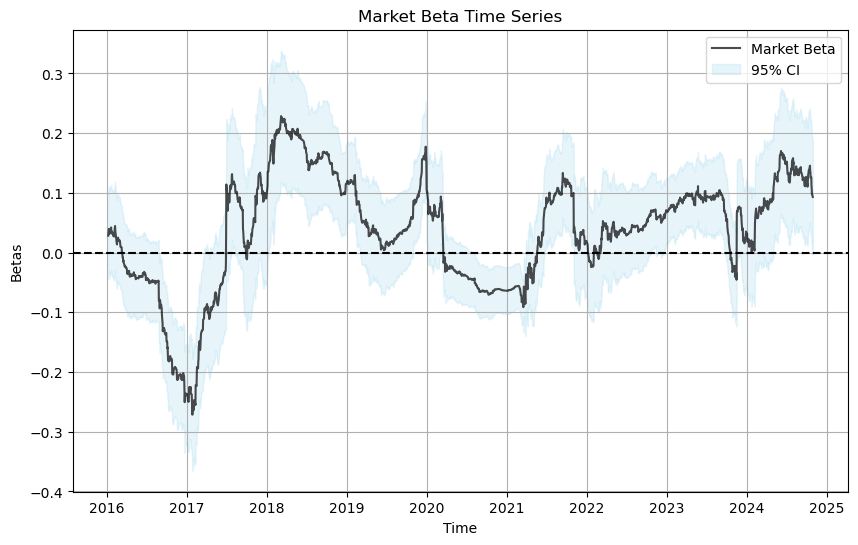

In [120]:
# Create Plot

plt.figure(figsize=(10, 6))
plt.plot(parameters_df['x'], label='Market Beta', color='black', alpha=0.7)
plt.fill_between(upper_df.index, lower_df['x_lower'], upper_df['x_upper'], color='skyblue', alpha=0.2, label='95% CI')
plt.axhline(y=0, color='black', linestyle='dashed')

# Config
plt.title('Market Beta Time Series')
plt.xlabel('Time')
plt.ylabel('Betas')
plt.legend()
plt.grid()

# Show
plt.show()

In [121]:
# Store the Zero Beta Portfolio

zbp_returns.name = 'zero_beta_portfolio'
zbp_returns.to_csv(r"..\additional_data\zero_beta.csv", header=True)

Why we are not concerned about look-ahead bias?

In this analysis, we are not designing a tradable investment strategy, but rather constructing a theoretical portfolio to explore the structure of systematic and non-systematic risk. By using historical betas relative to a benchmark, we create a market-neutral portfolio—orthogonal to market risk—as a way to isolate potential sources of return that are not explained by the CAPM beta. Since the portfolio is not intended for ex-ante forecasting or backtesting purposes, but rather as a risk decomposition tool, the presence of look-ahead bias does not invalidate its use in this context.